In [261]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})

In [13]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
#halo mass per 250 cubic megaparsecs per h0

In [14]:
#Output the arrays in a columnated format so I can see what I'm working with
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

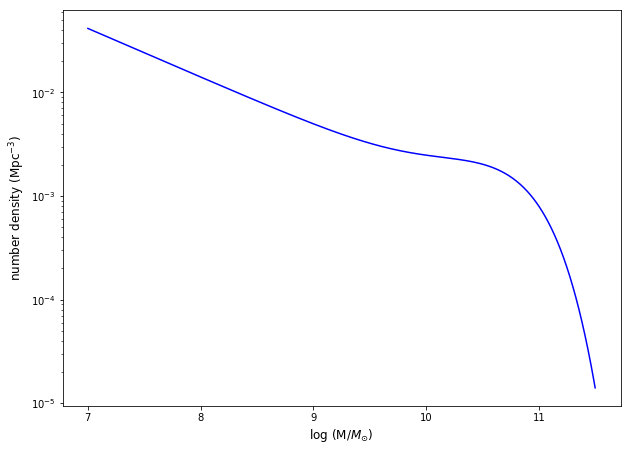

In [250]:
m_ast = 10.**10.66 #M* in solar mass
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
m = 10**logmratio #galaxy mass in solar mass
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)

galaxymassplt.semilogy(logmratio,phi,'b-')
galaxymassplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)

plt.show()

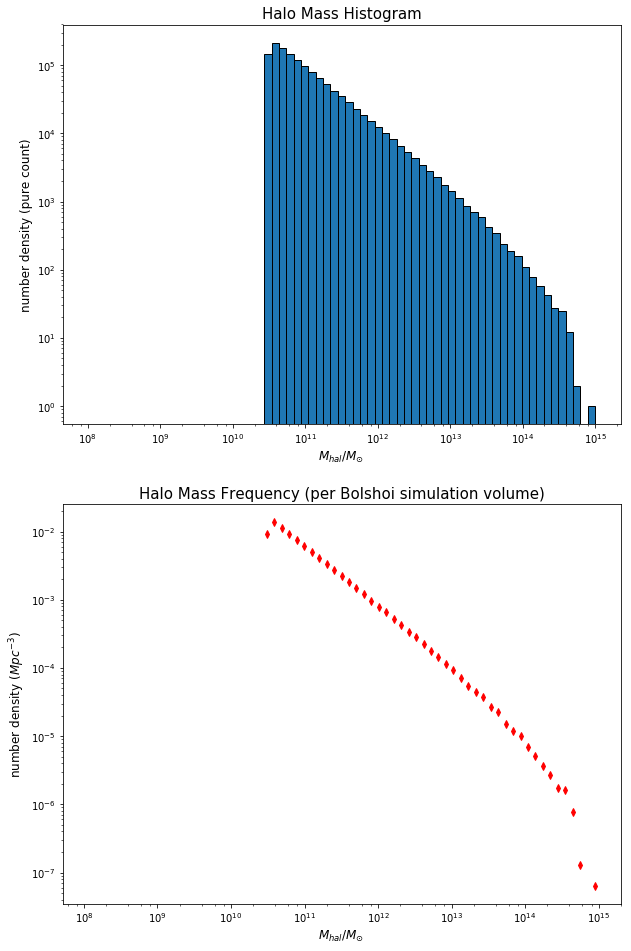

In [286]:
bins=np.logspace(8,15,(15.-8.)/0.1)
logbins=np.log10(bins)

fig=plt.figure(figsize=(10,25))

halomassplot=fig.add_subplot(3,1,1)
halofreq, binsout, patches = halomassplot.hist(halomass,bins=bins,edgecolor='k')
halomassplot.set_xscale('log')
halomassplot.set_yscale('log')
halomassplot.set_ylabel('number density (pure count)',fontsize=12)
halomassplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
halomassplot.set_title('Halo Mass Histogram',fontsize=15)

halofreq=halofreq/(250.)**3. #frequency per cubic megaparsec
midbins = (binsout[1:]+binsout[:-1])/2.
logmidbins=np.log10(midbins)

dotplot=fig.add_subplot(3,1,2)
dotplot.plot(midbins,halofreq,'rd',markersize=5)
dotplot.set_xscale('log')
dotplot.set_yscale('log')
dotplot.set_ylabel('number density ($Mpc^{-3}$)',fontsize=12)
dotplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
dotplot.set_title('Halo Mass Frequency (per Bolshoi simulation volume)',fontsize=15)

plt.show()

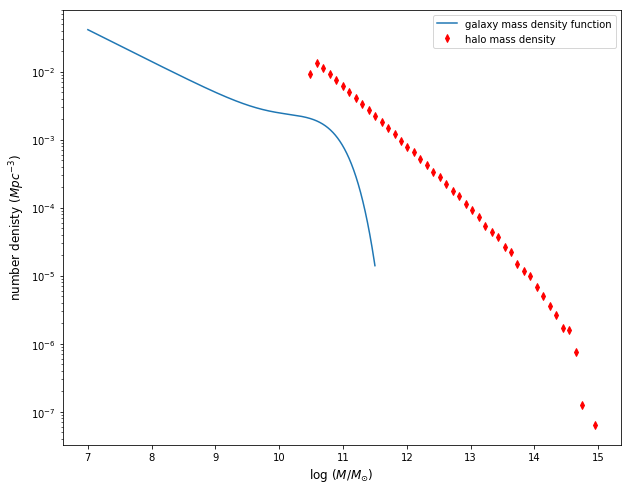

In [287]:
plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function') #Plot the galaxy mass function
plt.xlabel('log ($M/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty ($Mpc^{-3}$)',fontsize=12)
#plt.ylim(10.**-5.,10.**-0.5)
#plt.xlim(6.8,12.4)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density')

plt.legend()

plt.show()

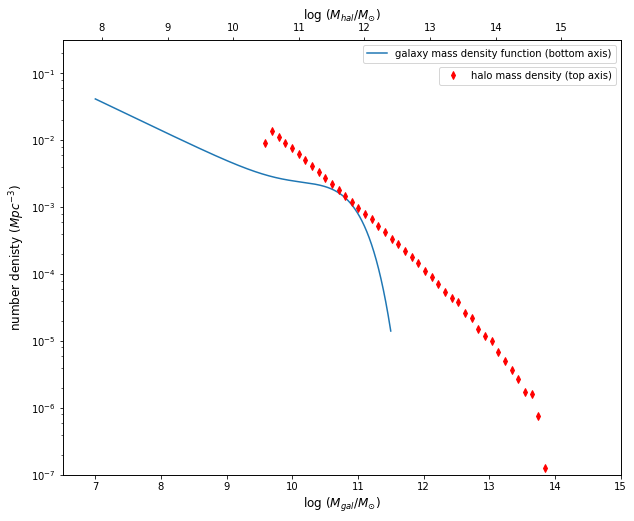

In [288]:
plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function (bottom axis)') #Plot the galaxy mass function
plt.xlabel('log ($M_{gal}/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty ($Mpc^{-3}$)',fontsize=12)
plt.xlim(6.5,15)

plt.legend()

plt.twiny() #make a second x axis
plt.ylim(10.**-7.,10.**-0.5)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density (top axis)')
plt.xlim(7.4,15.9)
plt.xlabel('log ($M_{hal}/M_{\odot}$)',fontsize=12)

plt.legend(bbox_to_anchor=[1,0.95])

plt.show()

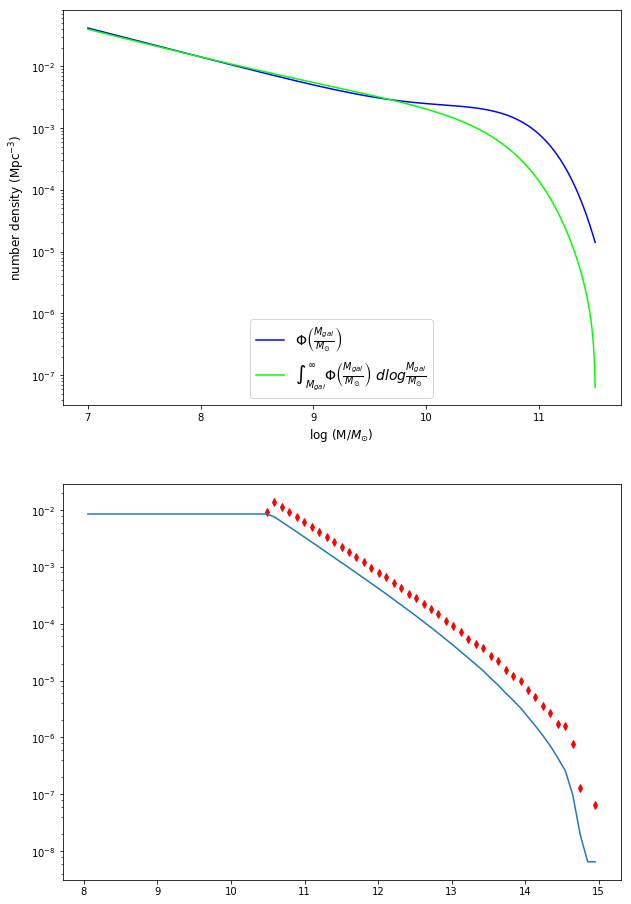

[1.4952E+01 1.4851E+01 1.4749E+01 1.4648E+01 1.4546E+01 1.4445E+01
 1.4344E+01 1.4242E+01 1.4141E+01 1.4039E+01 1.3938E+01 1.3836E+01
 1.3735E+01 1.3633E+01 1.3532E+01 1.3430E+01 1.3329E+01 1.3228E+01
 1.3126E+01 1.3025E+01 1.2923E+01 1.2822E+01 1.2720E+01 1.2619E+01
 1.2517E+01 1.2416E+01 1.2315E+01 1.2213E+01 1.2112E+01 1.2010E+01
 1.1909E+01 1.1807E+01 1.1706E+01 1.1604E+01 1.1503E+01 1.1402E+01
 1.1300E+01 1.1199E+01 1.1097E+01 1.0996E+01 1.0894E+01 1.0793E+01
 1.0691E+01 1.0590E+01 1.0488E+01 1.0387E+01 1.0286E+01 1.0184E+01
 1.0083E+01 9.9812E+00 9.8798E+00 9.7783E+00 9.6769E+00 9.5754E+00
 9.4740E+00 9.3725E+00 9.2711E+00 9.1696E+00 9.0682E+00 8.9667E+00
 8.8653E+00 8.7638E+00 8.6624E+00 8.5609E+00 8.4595E+00 8.3580E+00
 8.2566E+00 8.1551E+00 8.0537E+00]
0.101449275362


In [289]:
#CREATE THE ABUNDANCE CURVE FOR GALAXY MASS
revphi = np.flip(phi,0) #reverse galaxy number density array so I can calculate the area as the integral from M_gal to inf
revlogmratio = np.flip(logmratio,0) #reverse the logmratio array so I can plot the area later in the code
dx_gal = (logmratio.max()-logmratio.min())/(len(logmratio))
sumdy_gal = np.array([revphi[:i].sum() for i in np.arange(1,len(phi)+1,1)])
galaxyarea=sumdy_gal*dx_gal

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)
#Replot the galaxy mass density function created earlier
galaxymassplt.semilogy(logmratio,phi,'b-',
                      label='$\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)$')
galaxymassplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
#Plot the area under the galaxy mass density function according to the integral from M_gal to inf
galaxymassplt.semilogy(revlogmratio,galaxyarea,color=(0,1,0),
                       label='$\\int_{M_{gal}}^{\\infty}\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)\;'
                       'dlog\\frac{M_{gal}}{M_{\\odot}}$')
galaxymassplt.legend(fontsize=14,loc='lower center')

#CREATE THE ABUNDANCE CURVE FOR HALO MASS
revhalofreq = np.flip(halofreq,0) #reverse the halo frequency array so I can calculate the area as the integral from M_hal to inf
revlogmidbins = np.flip(logmidbins,0) #reverse the logmidbins array so I can plot the area later in the code
dx_hal=(logbins.max()-logbins.min())/(len(logbins)-1)
sumdy_hal=np.array([revhalofreq[:i].sum() for i in np.arange(1,len(revhalofreq)+1,1)])
haloarea=sumdy_hal*dx_hal

haloabundanceplt=fig.add_subplot(2,1,2)
haloabundanceplt.semilogy(logmidbins,halofreq,'rd',markersize=5)
haloabundanceplt.semilogy(revlogmidbins,haloarea)

plt.show()